In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [25]:
class World:
    def __init__(self, limits):
        """
        :param limits: the limits of all the dimensions, given by a list of tuples
        """
        self._limits = np.array(limits)
        self.dimensions = len(limits)
        self.spheres = []

    def add_sphere(self, sphere):
        def trespasses_limits(sphere):
            upper_limits = self._limits[:, 1]
            lower_limits = self._limits[:, 0]

            distances2upper_edge = upper_limits - sphere.center - sphere.radii
            distances2lower_edge = sphere.center - lower_limits - sphere.radii

            if np.any(distances2upper_edge < 0) or np.any(distances2lower_edge < 0):
                return True
            else:
                return False

        def contact_with_other_spheres(sphere):
            for other_sphere in self.spheres:
                if sphere.contact(other_sphere):
                    return True
            return False

        # now check if both conditions are satisfied
        if trespasses_limits(sphere) or contact_with_other_spheres(sphere):
            return False
        else:
            self.spheres.append(sphere)
            return True

    def clear(self):
        self.spheres = []


    def draw(self):
        def plt_sphere(self):
            """
            Copied from seminar 2
            """
            counter = 0
            fig = plt.figure()
            for s in self.spheres:
                c, r = s.center, s.radii
                ax = fig.gca(projection='3d')

                # draw sphere
                u, v = np.mgrid[0:2*np.pi:50j, 0:np.pi:50j]
                x = r*np.cos(u)*np.sin(v)
                y = r*np.sin(u)*np.sin(v)
                z = r*np.cos(v)


                ax.plot_surface(x+c[0], y+c[1], z+c[2], color='b', alpha=0.3)
                ax.set_xlim(0,1)
                ax.set_ylim(0,1)
                ax.set_zlim(0,1)
        if self.dimensions == 2:
            fig, ax = plt.subplots()
            for idx, sphere in enumerate(self.spheres):
                circle = plt.Circle(sphere.center, sphere.radii, color='r')
                ax.annotate('Sphere'+str(idx), xy=sphere.center, xytext=(sphere.center[0]+sphere.radii, sphere.center[1]+sphere.radii),
                            arrowprops=dict(facecolor='black', shrink=0.05))
                ax.add_artist(circle)
            ax.set_xlim(self._limits[0])
            ax.set_ylim(self._limits[1])
            plt.title('World in 2D')
            plt.show()
        else:
            if self.dimensions == 3:
                plt_sphere([sphere.center for sphere in self.spheres], [sphere.radii for sphere in self.spheres])
            else:
                print('Cannot draw world with more than 3 dimensions')




class Sphere:
    def __init__(self, center, radii):
        """
        Initializes a sphere
        :param center: Center of the sphere.
        :param radii: Radii of the sphere.
        """
        self.center = center
        self.radii = radii
    def contact(self, sphere):
        return np.linalg.norm(self.center - sphere.center) < self.radii + sphere.radii

In [26]:
world = World([(-4, 4), (-4, 4), (-4, 4)])
world.add_sphere(Sphere(np.array([0, 0, 0]), 1))
world.add_sphere(Sphere(np.array([2,2,2]), 2))
world.draw()


NameError: name 'plt_sphere' is not defined

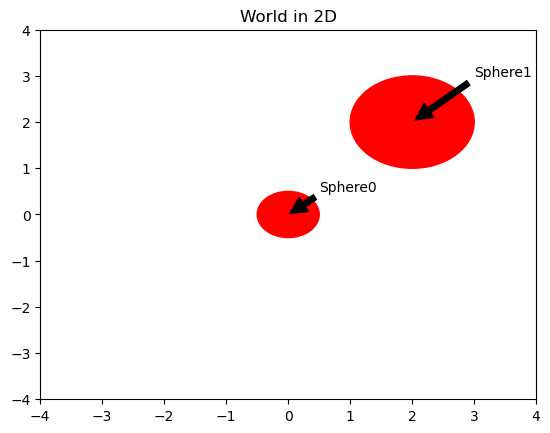

In [18]:
# 2d example
world = World([(-4, 4), (-4, 4)])
world.add_sphere(Sphere(np.array([0, 0]), 0.5))
world.add_sphere(Sphere(np.array([2,2]), 1))
world.draw()